# Statistical Programming Project 1

Prepared by: Zhansaya Jumasheva

## Introduction

The topic is this project is "Analysing Spotify Top 50 Songs". The chosen dataset was uploaded from Kaggle, and it represents the Top 50 songs on Spotify in 2021 and their different features, such as popularity, danceability, etc. 
The main research question is "What is the relationship between music's popularity and its features?". 
In other words, I am attempting to find out what artists were the most popular in 2021, what trends did the songs in 2021 have, and what is the correlation within different features of the music, and find how some features affect the music's popularity. 

First, I imported all the necessary libraries

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

There is the original data, and then the same data but ascending by popularity column

In [252]:
data =pd.read_csv('spotify_top50_2021.csv', )

In [371]:
data.describe()

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,86.800000,0.685720,0.64636,5.180000,-5.903920,0.620000,0.081374,0.253811,0.001606,0.182292,0.528884,121.083860,197488.400000,3.960000
std,14.57738,6.266203,0.124987,0.14712,3.868713,2.036948,0.490314,0.057164,0.235345,0.006425,0.137799,0.232789,29.252206,34727.260592,0.197949
min,1.00000,67.000000,0.380000,0.33900,0.000000,-11.639000,0.000000,0.028400,0.001460,0.000000,0.047600,0.082300,72.017000,132780.000000,3.000000
25%,13.25000,85.250000,0.597750,0.54525,1.000000,-7.186250,0.000000,0.046125,0.040000,0.000000,0.093225,0.401500,98.655500,172400.500000,4.000000
50%,25.50000,88.000000,0.714500,0.65650,5.500000,-5.485500,1.000000,0.063150,0.196000,0.000000,0.115000,0.518000,120.516500,198712.500000,4.000000
75%,37.75000,90.000000,0.774500,0.76475,8.000000,-4.258500,1.000000,0.094300,0.405500,0.000024,0.246500,0.706250,138.532000,215597.000000,4.000000
max,50.00000,95.000000,0.903000,0.89300,11.000000,-2.810000,1.000000,0.286000,0.827000,0.038200,0.688000,0.958000,180.917000,287120.000000,4.000000


In [254]:
data = data.sort_values(by=['popularity'],  ascending=False)
data

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
42,43,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,95,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.002940,0.1170,0.8810,107.998,172627,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.6880,166.928,178147,4
13,14,Ed Sheeran,Bad Habits,3rmo8F54jFF8OgYsqTxm5d,95,0.807,0.893,11,-3.745,0,0.0347,0.04510,0.000028,0.3660,0.5370,126.011,230747,4
22,23,Bad Bunny,Yonaguni,2JPLbjOn0wPCngEot2STUS,94,0.644,0.648,1,-4.601,1,0.1180,0.27600,0.000000,0.1350,0.4400,179.951,206710,4
8,9,Glass Animals,Heat Waves,02MWAaffLxlfxAUY7c5dvx,94,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4
39,40,Doja Cat,Need to Know,3Vi5XqYrmQgOYBajMWSvCi,93,0.664,0.609,1,-6.509,1,0.0707,0.30400,0.000000,0.0926,0.1940,130.041,210560,4
7,8,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
9,10,Måneskin,Beggin',3Wrjm47oTz2sjIgck11l5e,93,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,211560,4
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.1370,143.875,242013,4
37,38,The Neighbourhood,Sweater Weather,2QjOHCTQ1Jl3zawyYOpxh6,92,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.3980,124.053,240400,4


In [362]:
data.columns

Index(['id', 'artist_name', 'track_name', 'track_id', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

Here is the bar chart of the different artists and the number of their songs that are in Spotify Top 50.

/Users/a111/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


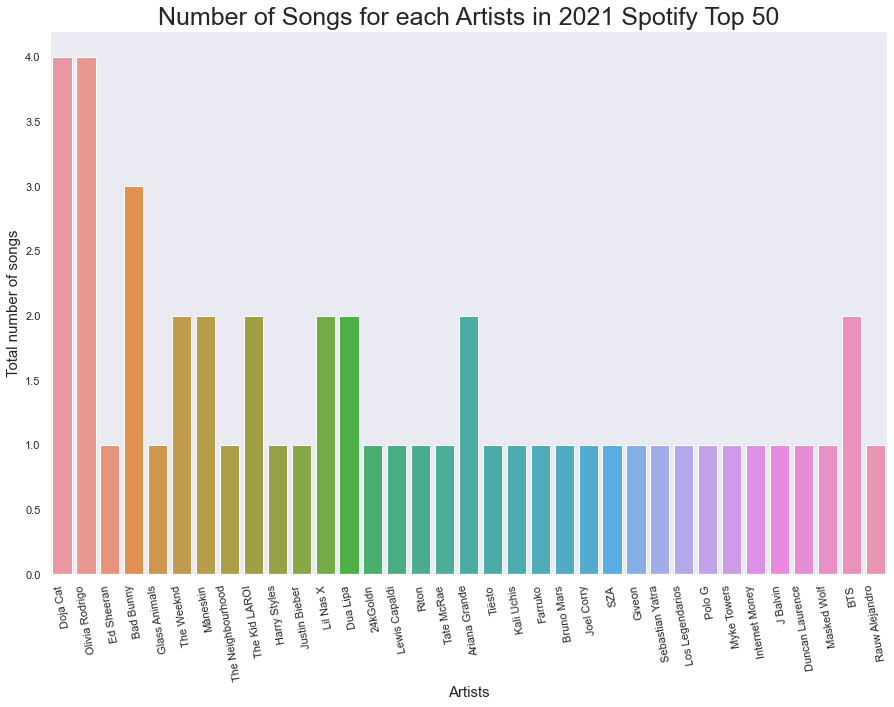

In [374]:
plt.figure(figsize=(15,10))
artists = data['artist_name']
sns.countplot(artists)
plt.xlabel('Artists', fontsize = 15)
plt.ylabel('Total number of songs', fontsize = 15)
plt.title('Number of Songs for each Artists in 2021 Spotify Top 50', fontsize = 25)
plt.xticks(rotation=100)
plt.show()

Then, I found the correlation between main features of the songs and visualized in heatmap.
There is also a plot pairwise relationship in a dataset.

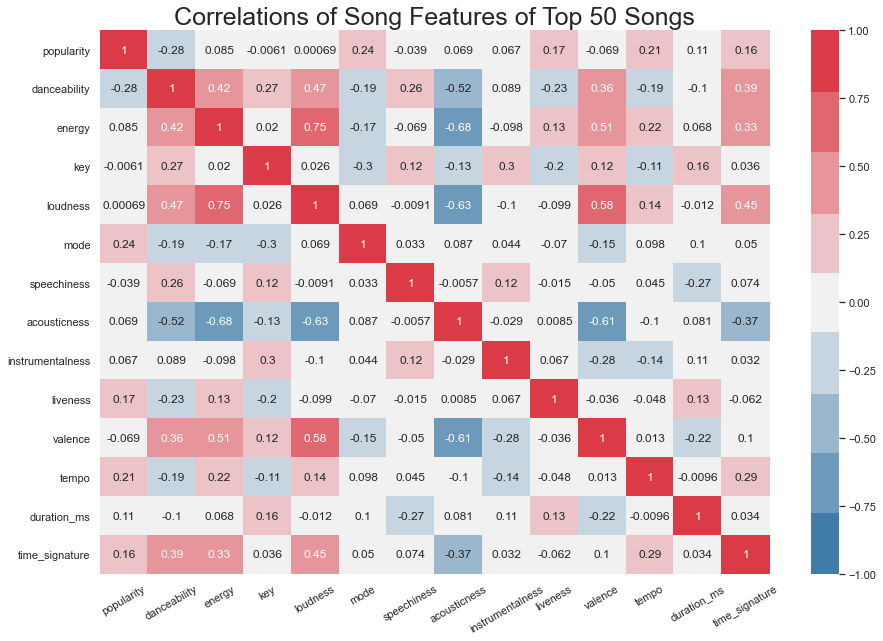

In [375]:
data1 = data[data.columns[2:]]
data1 = data1.sort_values('popularity', ascending = False)
corr = data1.corr()
plt.figure(figsize=(15, 10)) 
 
plot = sns.heatmap( 
    corr,  
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9), 
    square=False, annot=True) 
 
plot.set_xticklabels( 
    plot.get_xticklabels(), 
    rotation=30, 
     
) 
plt.title("Correlations of Song Features of Top 50 Songs", fontsize=25) 
plt.show()

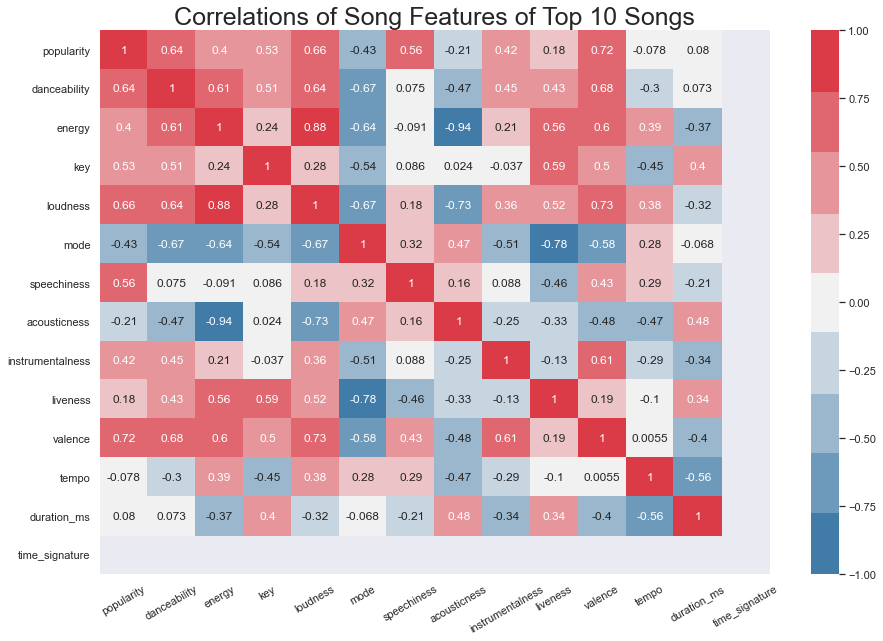

In [376]:
data2 = data1.head(10)
corr2 = data2.corr()
plt.figure(figsize=(15, 10)) 
 
plot2 = sns.heatmap( 
    corr2,  
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9), 
    square=False, annot=True) 
 
plot2.set_xticklabels( 
    plot2.get_xticklabels(), 
    rotation=30, 
     
) 
plt.title("Correlations of Song Features of Top 10 Songs", fontsize=25) 
plt.show()

Text(0.5, 1.0, 'The Pairwise Relationship of Songs Features')

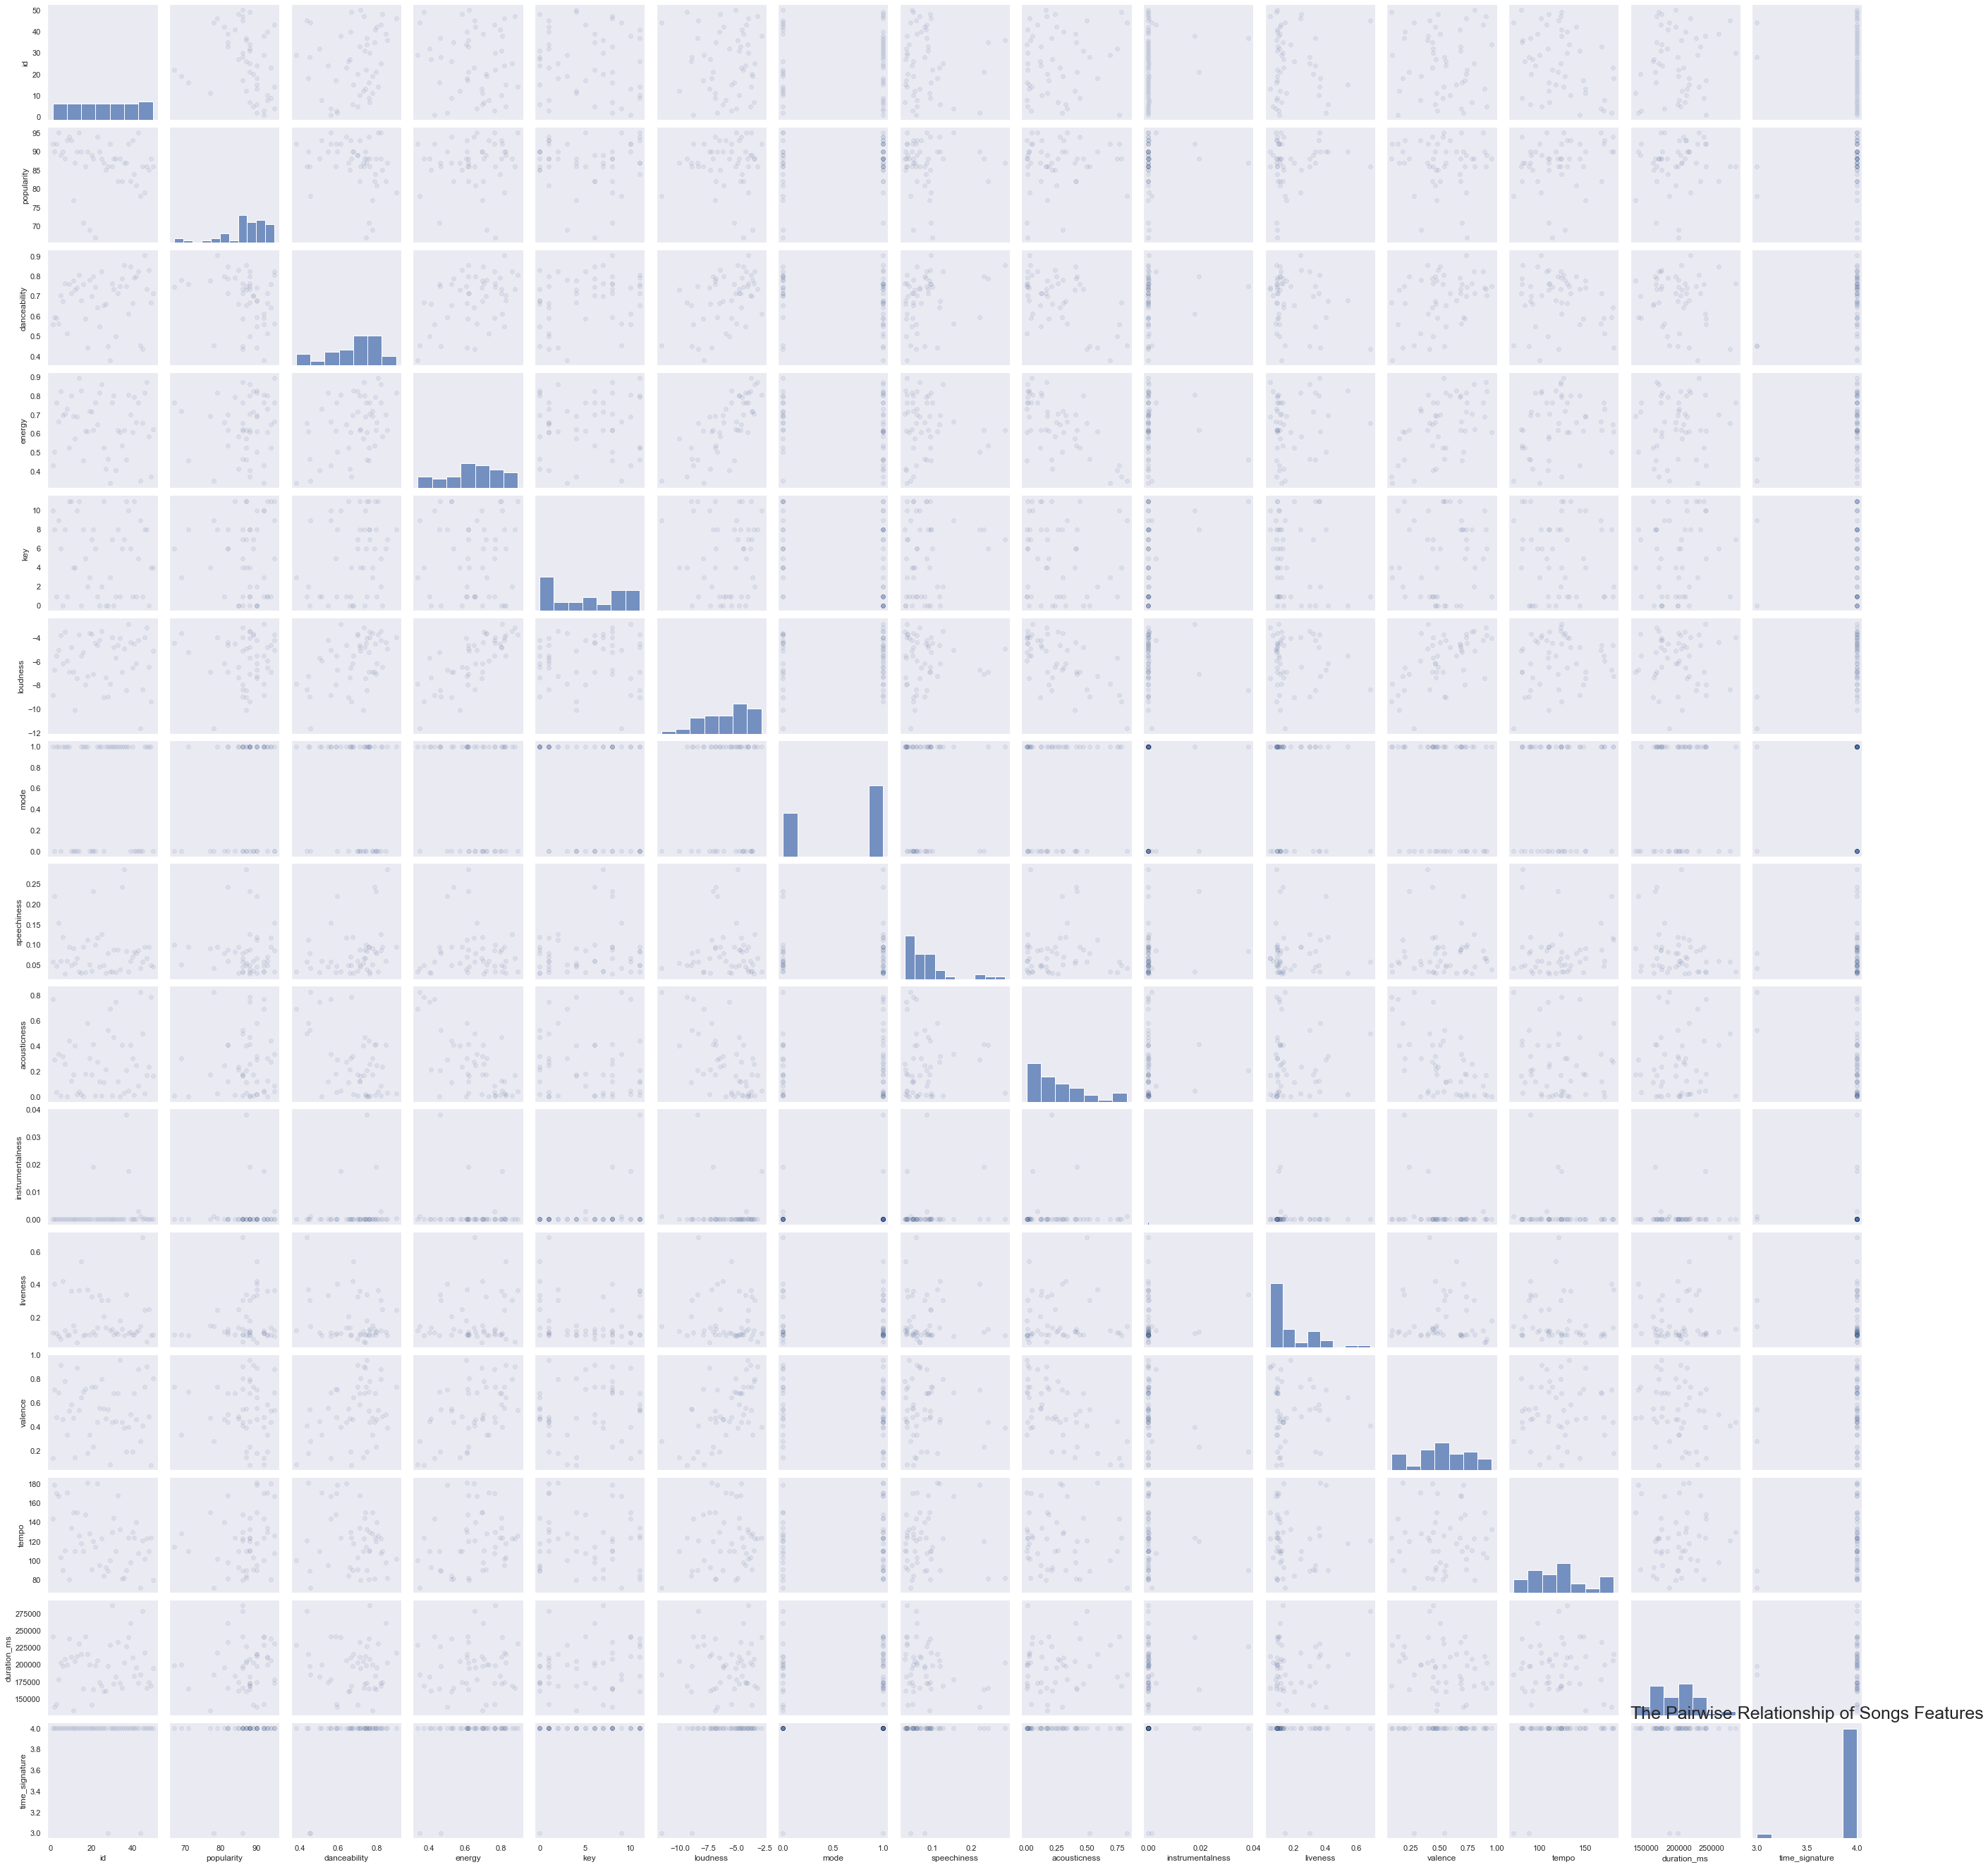

In [377]:
sns.pairplot(data, plot_kws=dict(alpha=0.1, edgecolor='black'))
plt.title("The Pairwise Relationship of Songs Features", fontsize = 25)

Next plot represents the prevalence of the Major and Minor modes among Top songs.

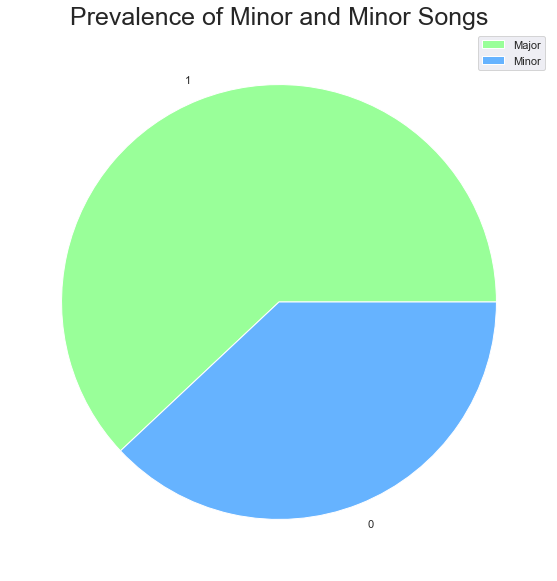

In [384]:
mode_data = data['mode'].value_counts()
colors = ['#99ff99','#66b3ff']
plt.figure(figsize=(10,10))
mode_data.plot.pie(label="", colors = colors);
plt.title("Prevalence of Minor and Minor Songs", fontsize = 25)
labels = ['Major', 'Minor']
plt.legend(labels, loc="best")


As seen in correlation heatmap, there are some positive correlations between some song features and their popularity. 
So I visualized a linear relationship between them through regression.

<Figure size 1080x1080 with 0 Axes>

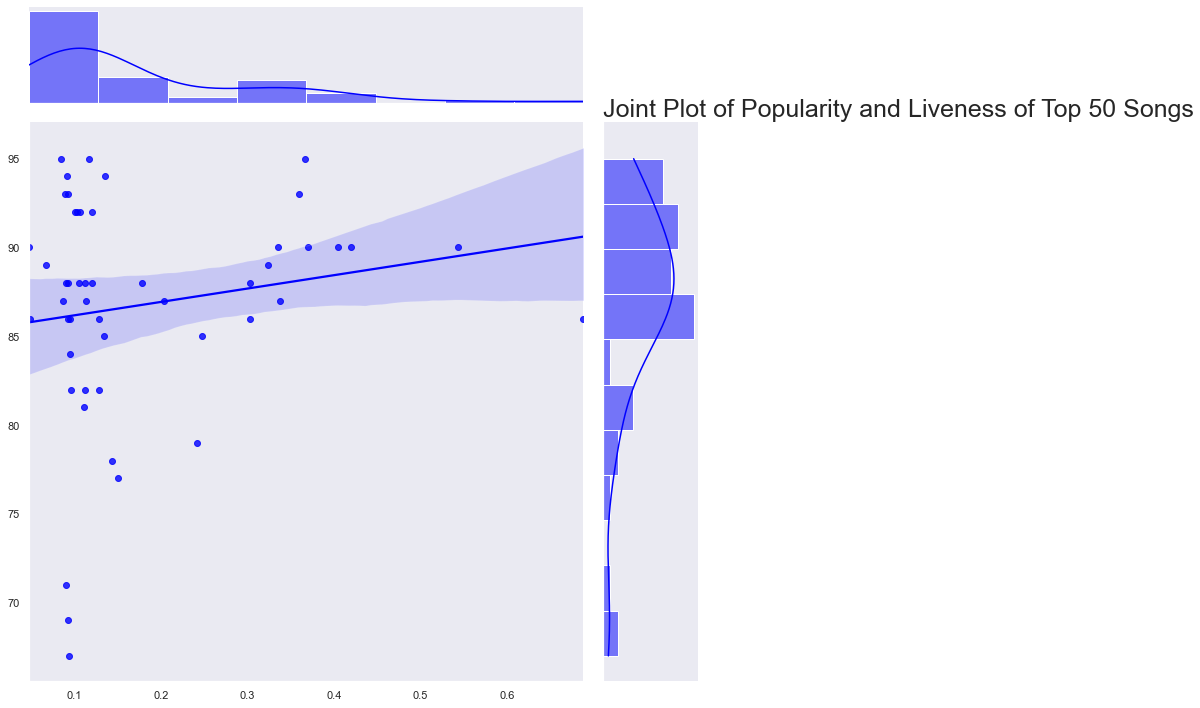

In [390]:
plt.figure(figsize=(15,15))
sns.jointplot(x=data["liveness"].values, y=data['popularity'].values, height=10, kind="reg",color='Blue')
plt.ylabel('popularity', fontsize=15)
plt.xlabel("liveness", fontsize=15)
plt.title("Joint Plot of Popularity and Liveness of Top 50 Songs", fontsize = 25, loc = 'left')
plt.show()

Text(0.0, 1.0, 'Joint Plot of Popularity and Tempo of Top 50 Songs')

<Figure size 1080x1080 with 0 Axes>

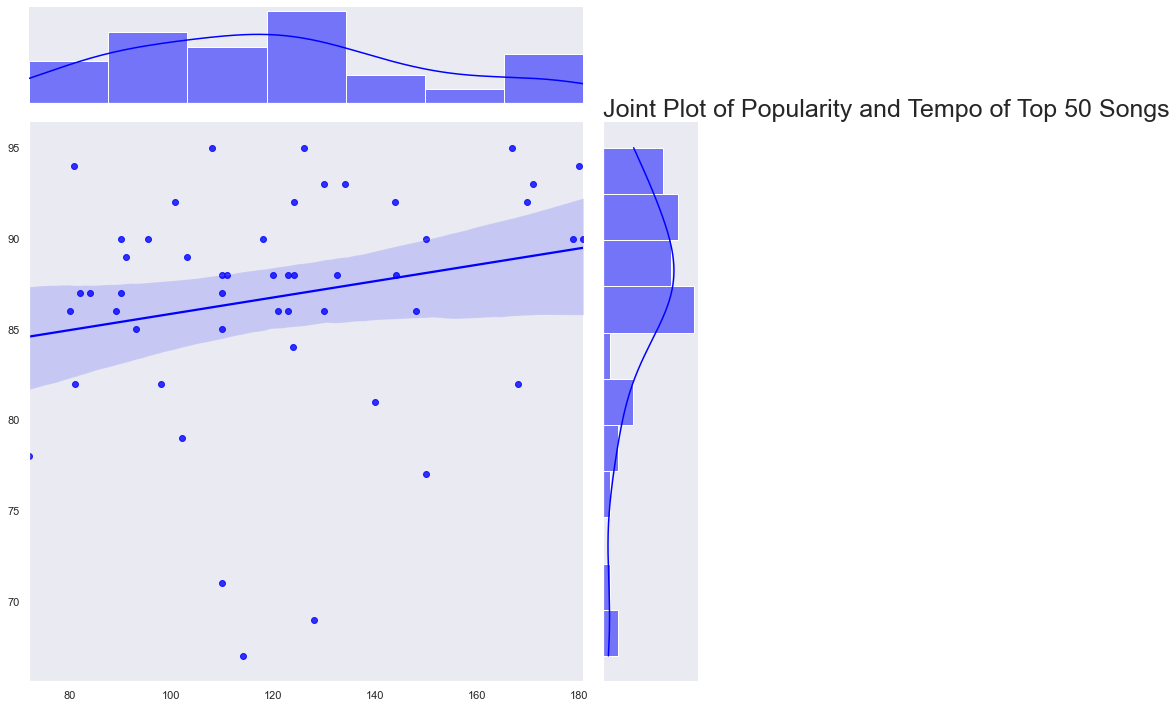

In [388]:
plt.figure(figsize=(15,15))
sns.jointplot(x=data["tempo"].values, y=data['popularity'].values, height=10, kind="reg",color='Blue')
plt.ylabel('popularity', fontsize=15)
plt.xlabel("tempo", fontsize=15)
plt.title("Joint Plot of Popularity and Tempo of Top 50 Songs", fontsize = 25, loc = "left")

Text(0.0, 1.0, 'Joint Plot of Popularity and Danceability of Top 50 Songs')

<Figure size 1080x1080 with 0 Axes>

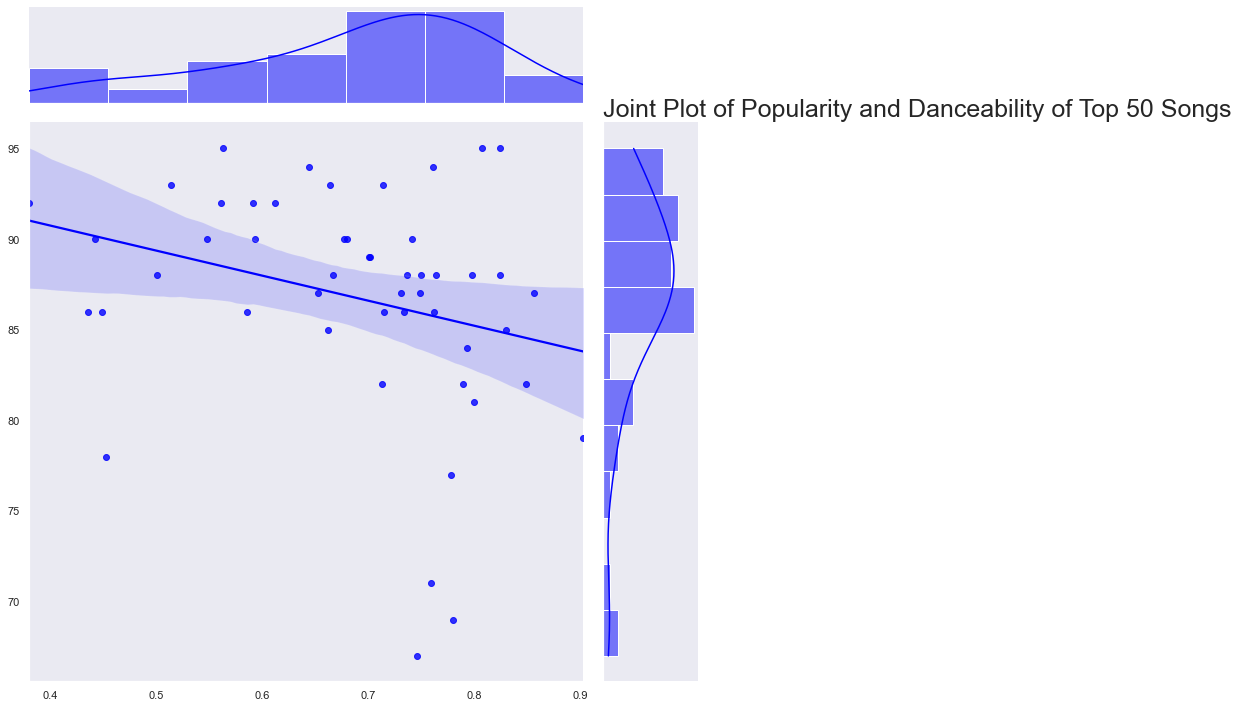

In [389]:
plt.figure(figsize=(15,15))
sns.jointplot(x=data["danceability"].values, y=data['popularity'].values, height=10, kind="reg",color='Blue')
plt.ylabel('popularity', fontsize=15)
plt.xlabel("danceability", fontsize=15)
plt.title("Joint Plot of Popularity and Danceability of Top 50 Songs", fontsize = 25, loc = 'left')

## Discussion

To begin the analysis of the data, we should look at the description of the dataset we have.
The dataset has 50 observations and 18 columns. The columns are 'id', 'artist_name', 'track_name', 'track_id', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms' and 'time_signature'. 
13 of them are appropriate to discover more about the features of the songs, starting with the "danceability" column and all the following columns. 
Furthermore, the first look at the data shows that it does not require additional processing or cleaning of the data as there are no "NaN" values, and all the column names seem appropriate.

In the first plot, I tried to look for the artists who have the most songs in the Top 50. As seen from the bar chart, the artists that had the most songs were Doja Cat and Olivia Rodrigo. They both had 4 songs. Besides that, there is Bad Bunny who had 3 songs while all the other artists had 2 or 1. 

In the next plot, we can see the correlation between the main features of the songs. It is visualized in the heatmap and pairwise relationships plot in the dataset. It is hard to see any strong correlations between features. However, it is possible to see the negative correlation between acousticness of the song and loudness as well as between acousticness and energy. So, it is possible to imply that acoustic songs are quiet and calm. There is also a positive correlation between energy and danceability as well as between loudness and danceability. So, loud and energetic songs are considered to be danceable. 

Another observation is that there is a positive correlation between popularity and tempo, and popularity and liveness. It could imply that live and high tempo songs have a better chance to become popular. There is also a negative correlation between danceability and the popularity of the songs. 
However, analyzing the Top 10 songs in the dataset, we can see that the positive correlations between popularity and dancebility/loudness/energy become stronger. The correlation between acousticness and popularity also changes and becomes negative. 

The next plot is the prevalence of the Major and Minor modes of songs among the most popular songs. It is clear that hits are mostly written in Major mode. 

After that, I visualized the relationships between popularity and liveness/tempo/danceability more closely. There are three joint plots of these relationships. It shows the weak positive relationship between popularity and liveness, popularity and tempo, and weak negative relationships between popularity and danceability. 

## Conclusion 

In conclusion, the given project analyzed the Top 50 Songs on Spotify to find out some trends among popular songs in 2021, and find out the relationships between song features and song popularity. 
I have discovered that the artists who have had the most number popular songs are Olivia Rodrigo and Doja Cat. Also, the majority of popular songs are written in Major mode. 
More live and high tempo songs have a better chance to become popular, however, when we look at the Top 10 songs we can see that correlation between popularity and danceability become stronger. The loud and energetic songs are considered to be more danceable. 
Moreover, the popularity of songs and acousticness have negative correlation and the acoustic songs are considered to be calm and quiet
So, the conclusion I have is that the most popular songs are more danceable, while calm music has less chance to be the most popular song. 

Although the analysis that has been done answers the research questions, the proofs of these answers can be not reliable. The conclusions were made based on a correlation of about 0.2-0.6, which are not strong. 
The conclusion could be more confident if the data had more observations.


To explore the questions more deeply it would be better to analyze not only bigger data but also the data from different years. It would allow looking at how trends change throughout time.
If I had more experience working with data and deeper knowledge of various tools, I would attempt to make a KNN-model to predict the popularity of the songs in the future.
Furthermore, the popularity of the song could depend not only on the song's characteristics but also on the artist. The bigger artist has more fanbase, which allows her/him to have hits even if the songs do not fit into "trends".


In [370]:
# y = data1.loc[:, 'popularity']
# # X = data1.drop('popularity', axis)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)
# # knn_model = KNeighborsClassifier()
# # knn_model.fit(X_train, y_train)
# # knn_acc = knn_model.score(X_test, y_test)
# X_train